<a href="https://colab.research.google.com/github/OlandezVoador/SI_projeto/blob/silver/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Final da Disciplina Sistemas Inteligentes**

**Importando as bibliotecas que serão utilizadas no trabalho**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


**Primeiramente será importado localmente o dataset através de um csv baixado no site Kaggle.**

In [ ]:
IMDB = 'Dataset-IMDB.csv'

**Agora iremos fazer a leitura do dataset e mostrá-lo para compreender melhor o dataset.**

In [ ]:
ds_IMDB = pd.read_csv(IMDB, engine='python', encoding='utf-8', error_bad_lines=False)

<ipython-input-3-b7581fb8171d>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ds_IMDB = pd.read_csv(IMDB, engine='python', encoding='utf-8', error_bad_lines=False)
Skipping line 23943: unexpected end of data


In [ ]:
ds_IMDB

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
23936,23938,The Closer She Gets... is an artful documentar...,The Closer She Gets ... é um documentário artí...,pos
23937,23939,I saw this documentary film at the 2005 Slamda...,Eu vi este documentário no festival de filmes ...,pos
23938,23940,"I went into ""The Closer She Gets"" knowing that...","Eu entrei em ""The Closer She Gets"" sabendo que...",pos
23939,23941,"Master Kieslowsky came with an idea in 1993, t...","Mestre Kieslowsky veio com uma idéia em 1993, ...",pos


**Podemos notar que há 4 colunas nesse dataset, sendo elas:**

**1.   ID do comentário**

**2.   Texto do comentário em inglês**

**3.   Texto do comentário em Português**

**4.   Sentimento Referente ao comentário**

# Análise quantitativa

**Além de verificar como os dados estão dispostos no dataset, outro quesito importante (visto durante as aulas), é verificar se a quantidade de dados classificados como positivos ou negativos estão balanceados, isto é, verificar se a quantidade de dados positivos não é muito maior em relação aos negativos e vice versa.**

In [ ]:
ds_IMDB.sentiment.value_counts()

result = ds_IMDB.sentiment.value_counts("neg")

In [ ]:
result*100

neg    51.748047
pos    48.251953
Name: sentiment, dtype: float64

In [ ]:
# Resumo estatístico
summary_stats = ds_IMDB.describe()
print(summary_stats)

                 id
count  23744.000000
mean   11985.087264
std     6919.192577
min        1.000000
25%     5986.750000
50%    12011.500000
75%    17978.250000
max    23942.000000


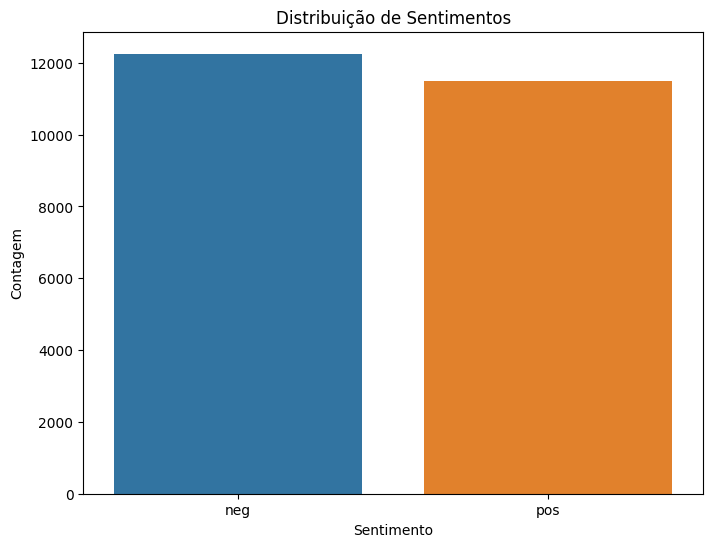

In [ ]:
# Gráfico de barras para visualizar a distribuição dos sentimentos
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=ds_IMDB)
plt.title('Distribuição de Sentimentos')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.show()

# Análise qualitativa

In [ ]:
# Exemplos de textos positivos
positive_samples = ds_IMDB[ds_IMDB['sentiment'] == 'pos']['text_pt'].sample(5)
print("Exemplos de Textos Positivos:\n", positive_samples)

# Exemplos de textos negativos
negative_samples = ds_IMDB[ds_IMDB['sentiment'] == 'neg']['text_pt'].sample(5)
print("\nExemplos de Textos Negativos:\n", negative_samples)


Exemplos de Textos Positivos:
 23929    Após uma estrada rochosa de cerca de 7 anos na...
20282    Paródia muito divertida com grande atenção aos...
17674    Este filme é um para passar o tempo curto, ent...
18944    Um documentário de abertura sobre o cerco de 1...
13955    Se você quiser ver um filme estrelado por Stan...
Name: text_pt, dtype: object

Exemplos de Textos Negativos:
 8046    Apenas vi isso .... a história, o enredo, o ro...
1462    Eu gosto de uma boa música de novidade. Não, e...
9057    Eu me aproximei desse filme com o entendimento...
6912    Eu não sou tão velha que eu não me lembro de r...
4725    Begotten é, sem dúvida, alguém tenta a origina...
Name: text_pt, dtype: object


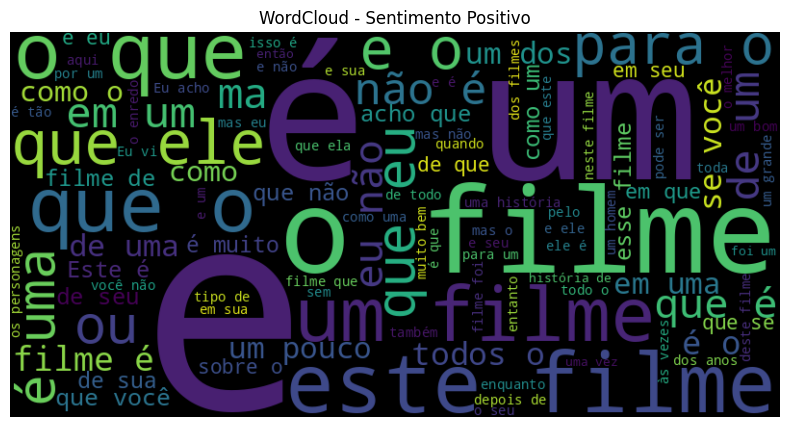

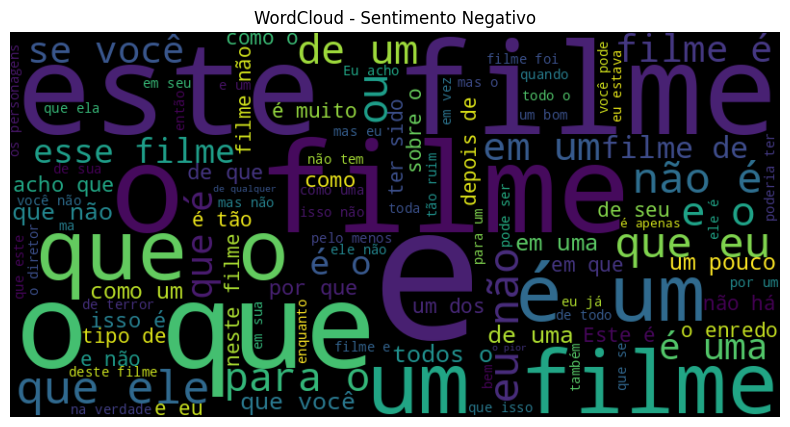

In [ ]:
from wordcloud import WordCloud

# Verificar se há textos disponíveis para criar a nuvem de palavras (positivos)
positive_texts = ds_IMDB[ds_IMDB['sentiment'] == 'pos']['text_pt']
if not positive_texts.empty:
    positive_text = ' '.join(positive_texts)
    wordcloud_positive = WordCloud(width=800, height=400, random_state=42, max_words=100).generate(positive_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title('WordCloud - Sentimento Positivo')
    plt.axis('off')
    plt.show()
else:
    print("Não há textos disponíveis para criar a nuvem de palavras (sentimento positivo).")

# Faça o mesmo para sentimentos negativos
negative_texts = ds_IMDB[ds_IMDB['sentiment'] == 'neg']['text_pt']
if not negative_texts.empty:
    negative_text = ' '.join(negative_texts)
    wordcloud_negative = WordCloud(width=800, height=400, random_state=42, max_words=100).generate(negative_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title('WordCloud - Sentimento Negativo')
    plt.axis('off')
    plt.show()


# Processamento dos dados e Modelagem

**Agora, iremos realziar um tratamento de dados no nosso dataset, para poder eliminar possíveis linhas que estão sem informações ou linhas que estejam com comentários duplicados.**

In [ ]:
ds_IMDB_1 = ds_IMDB.dropna(how='all')

In [ ]:
ds_IMDB_2 = ds_IMDB.drop_duplicates(subset=['text_en', 'text_pt'])

In [ ]:
ds_IMDB = ds_IMDB_2

In [ ]:
ds_IMDB

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
23936,23938,The Closer She Gets... is an artful documentar...,The Closer She Gets ... é um documentário artí...,pos
23937,23939,I saw this documentary film at the 2005 Slamda...,Eu vi este documentário no festival de filmes ...,pos
23938,23940,"I went into ""The Closer She Gets"" knowing that...","Eu entrei em ""The Closer She Gets"" sabendo que...",pos
23939,23941,"Master Kieslowsky came with an idea in 1993, t...","Mestre Kieslowsky veio com uma idéia em 1993, ...",pos


**Nesta parte, iremos realizar a parte de separação dos dados. Eles serão separados em dados de treino e dados de teste.**

**Nos exemplos vistos em aula, nós utilizamos dados qualitativos em arrays para realizar esse tipo de separação, entretanto, a base de dados do IMDB é uma planilha (csv) constituida apenas por texto e não por números. Sendo assim, iremos utilizar as colunas do dataset para gerar esse treinamento.**

# **Separação e Classificação dos Dados em Português**

In [ ]:
x = ds_IMDB.text_pt;

y = ds_IMDB.sentiment;

**Dado que a função .fit() do classificador exige dados numéricos, iremos formatar os dados de entrada e classes utilizando o Processamento de Linguagem Natural que é basicamente um interpretador de texto que tornará os dados compatíveis**

* Criando o classificador através do método SVC dado que os dados de entrada serão vetorizados (Sparse Matrix)

In [ ]:
svc = LinearSVC(C=1.0, loss='hinge', dual=False, multi_class='crammer_singer');

* Criando uma função que transforma texto em _Lower Case_, retira caracteres especiais e retorna a palavra formatada

In [ ]:
def remove_special_chars(word, bad_chars):
    result = word.lower();

    for i in bad_chars:
        result = result.replace(i, '');

    return result;

* Função para formatação das classes

In [ ]:
## Array com os caracteres a serem removidos
bad_chars = [';', ':', '!', "*", ",", "."];

def format_labels(y):
    label_result = [];

    for label in y:
        if label == 'pos':
            label_result.append(1);
        else:
            label_result.append(0);

    return np.array(label_result);

* Formatando os dados de entrada

In [ ]:
formatted_x = [];

for curr_word in x:
    formatted_string = remove_special_chars(curr_word, bad_chars);

    formatted_x.append(formatted_string);

* Inicializando a vetorização dos dados de entrada

In [ ]:
## Inicializando o vetorizador
tf_vectorizer = TfidfVectorizer();

numeric_x = tf_vectorizer.fit_transform(formatted_x);

* Criando a lista com as labels formatadas

In [ ]:
numeric_y = format_labels(y);

**Realização da separação dos dados já vetorizados em dados de teste e treinamento**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(numeric_x, numeric_y, test_size = 0.25, random_state = 75);

print('Formato dos dados de entrada para treinamento: {}'.format(x_train.shape));
print('Formato dos dados de entrada para teste: {}'.format(x_test.shape));
print('Formato dos labels para treinamento: {}'.format(y_train.shape));
print('Formato dos labels para teste: {}'.format(y_test.shape));

Formato dos dados de entrada para treinamento: (17808, 100068)
Formato dos dados de entrada para teste: (5936, 100068)
Formato dos labels para treinamento: (17808,)
Formato dos labels para teste: (5936,)


**Realização do fit e predição para o modelo SVC**

In [ ]:
svc = svc.fit(x_train, y_train);

**Realizando a predição**

In [ ]:
y_pred = svc.predict(x_test);

print(y_pred);

[0 1 0 ... 0 0 0]


**Realizando a análise dos resultados através das funções _accuracy_score_ e _confusion_matrix_**

In [ ]:
print('A Accuracy Score para a predição do modelo LinearSVC é {}'.format(accuracy_score(y_test,y_pred)))
print('A Precision Score para a predição do modelo LinearSVC é {}'.format(precision_score(y_test,y_pred)))
print('A Recall Score para a predição do modelo LinearSVC é {}'.format(recall_score(y_test,y_pred)))

A Accuracy Score para a predição do modelo LinearSVC é 0.89588948787062
A Precision Score para a predição do modelo LinearSVC é 0.8965160400137978
A Recall Score para a predição do modelo LinearSVC é 0.8909838875557079


Text(0.5, 1.0, 'Matriz de Confusão LinearSVC (IMDB Review Dataset)')

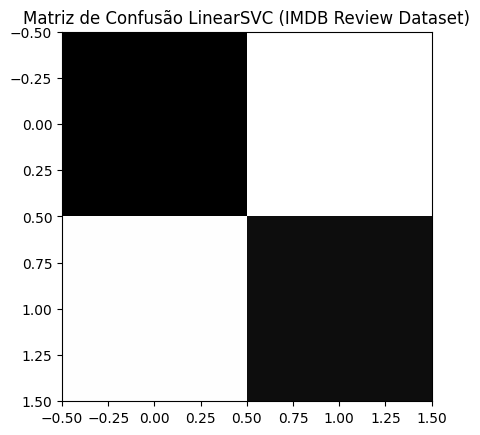

In [ ]:
svc_confusion_matrix = confusion_matrix(y_test,y_pred)

plt.imshow(svc_confusion_matrix, cmap = 'Greys')
plt.title('Matriz de Confusão LinearSVC (IMDB Review Dataset)')